# Veriyi Getirme

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/lardof/Machine Learning/community_health_MLR.csv')

In [5]:
df.head()

,yas,cinsiyet,ırk,kilo,boy,visits
0,47,0,4,111.0,165.10,28
1,26,1,3,127.0,167.64,23
2,26,1,2,90.0,172.72,14
3,39,1,3,107.0,185.42,21
4,55,1,1,90.0,154.94,27


# Veri Düzenleme


In [7]:
df['vki'] = round(df['kilo'] / (df['boy']/100)**2,2)

In [8]:
df.head()

,yas,cinsiyet,ırk,kilo,boy,visits,vki
0,47,0,4,111.0,165.10,28,40.72
1,26,1,3,127.0,167.64,23,45.19
2,26,1,2,90.0,172.72,14,30.17
3,39,1,3,107.0,185.42,21,31.12
4,55,1,1,90.0,154.94,27,37.49


In [9]:
df.to_csv('community_healt_evolved.csv', index=False)

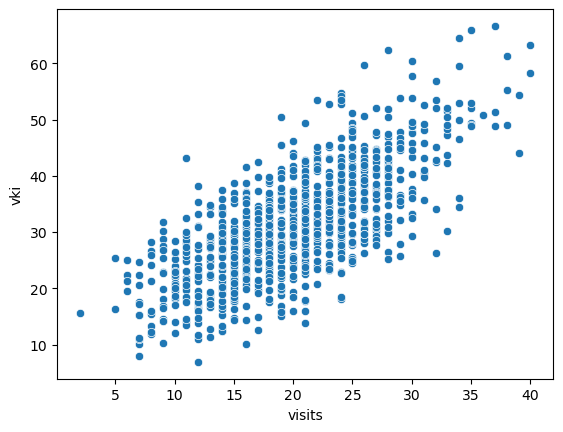

In [14]:
sns.scatterplot(data=df, x='visits', y='vki');

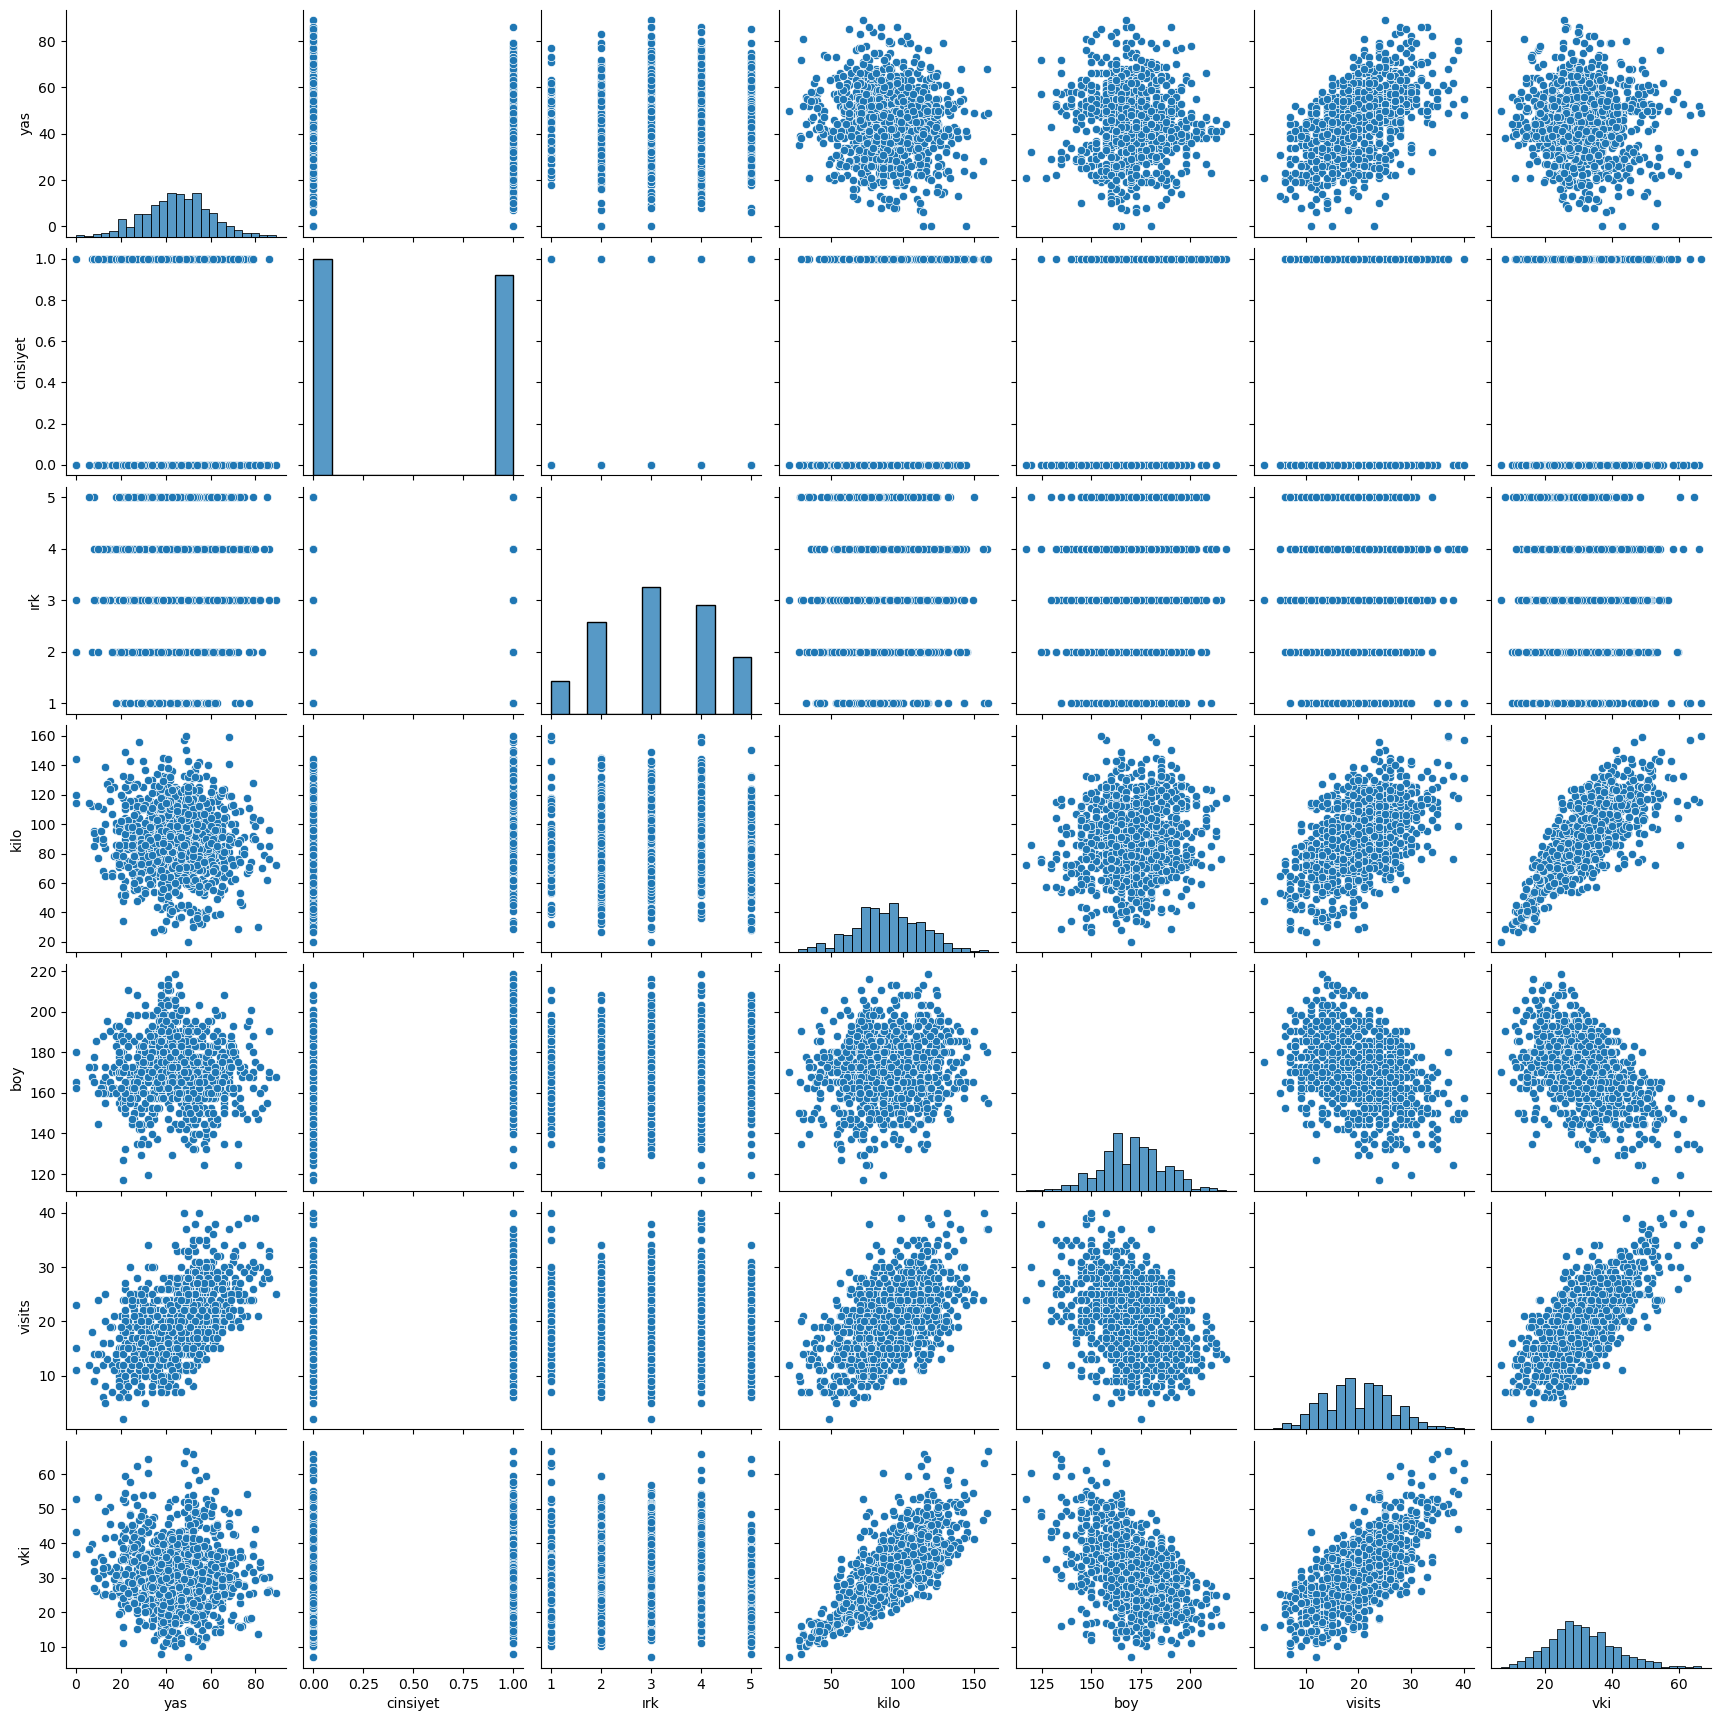

In [16]:
sns.pairplot(df)

In [17]:
df.corr()
#vki ile visits arasında 0.72 korelasyon değerimiz var bu çok iyi demek

,yas,cinsiyet,ırk,kilo,boy,visits,vki
yas,1.000000,0.023866,0.009756,-0.084586,-0.063822,0.539543,-0.041532
cinsiyet,0.023866,1.000000,0.030425,0.272045,0.296193,0.066747,0.051034
ırk,0.009756,0.030425,1.000000,0.018091,0.031556,0.006324,-0.006286
kilo,-0.084586,0.272045,0.018091,1.000000,0.142563,0.543433,0.772019
boy,-0.063822,0.296193,0.031556,0.142563,1.000000,-0.385644,-0.492589
visits,0.539543,0.066747,0.006324,0.543433,-0.385644,1.000000,0.723840
vki,-0.041532,0.051034,-0.006286,0.772019,-0.492589,0.723840,1.000000


In [20]:
#Train Test Split

In [23]:
X = df.drop('visits', axis=1)
y = df['visits']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X.head()

,yas,cinsiyet,ırk,kilo,boy,vki
0,47,0,4,111.0,165.10,40.72
1,26,1,3,127.0,167.64,45.19
2,26,1,2,90.0,172.72,30.17
3,39,1,3,107.0,185.42,31.12
4,55,1,1,90.0,154.94,37.49


In [26]:
y.head()

0    28
1    23
2    14
3    21
4    27
Name: visits, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

In [61]:
X_train.head()

,yas,cinsiyet,ırk,kilo,boy,vki
916,43,1,4,41.0,167.64,14.59
234,48,1,3,75.0,167.64,26.69
711,23,0,4,96.0,182.88,28.70
532,56,0,3,72.0,162.56,27.25
289,50,1,3,78.0,177.80,24.67


# Lin Regr

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
regr = LinearRegression()

In [64]:
regr.fit(X_train, y_train)

LinearRegression()

In [65]:
test_pred = regr.predict(X_test)

In [66]:
test_pred

array([25.20107927, 16.59673813, 15.56189606, 12.246424  , 28.46585669,
       12.27896227, 18.32626524, 14.64486356, 26.05848403, 16.30435707,
       13.72652155, 17.08703193, 17.16224782, 14.46749881, 28.10530447,
       11.88201766, 17.61682287, 21.63361446, 24.48849186, 12.6276235 ,
       11.51084508, 31.21812792, 20.10642313, 16.90931633, 22.25769097,
       22.70883174, 21.96241235, 14.69963967, 32.67620516, 16.22623139,
       17.98947374, 27.94256948, 22.66034421, 30.49699145, 27.24105553,
       14.00112573, 18.24617249, 20.62344544, 10.88755115, 24.46979   ,
       18.86903867, 18.47516069, 24.70343364, 20.76527773, 13.20049453,
       17.04818287, 24.52492331,  8.76159063, 19.84150377, 30.27927201,
       20.53774304, 24.15594453, 23.10236089, 16.45741126,  8.62216935,
       17.71317621, 14.52565848, 17.18129061, 30.47992948, 20.79541783,
       21.5794178 , 18.64162455, 13.03482991, 24.51104616, 17.88548104,
       14.49850488, 19.30937901, 13.94946949, 15.82997494, 36.60

# Performans İnceleme

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [69]:
print('Theta :     ', (regr.coef_,))
print('intercept : ', (regr.intercept_,))
print('R^2 :       ', (r2_score(y_test,test_pred),))
print('MAE :       ', (mean_absolute_error(y_test, test_pred),))
print('RMSE :      ', (np.sqrt(mean_squared_error(y_test,test_pred),)))

Theta :      (array([ 0.24779044,  0.08903806,  0.03980642,  0.01356321, -0.00076531,
        0.46940526]),)
intercept :  (-7.147910563215596,)
R^2 :        (0.8638578313598122,)
MAE :        (2.093803523642064,)
RMSE :       2.454427825964537


# Final

In [70]:
final = LinearRegression()

In [71]:
final.fit(X,y)

LinearRegression()

In [72]:
y_hat = final.predict(X)

In [73]:
final.coef_

array([2.48831294e-01, 9.60169663e-02, 2.52165161e-02, 8.60619014e-03,
       2.24879362e-05, 4.81854669e-01])

In [74]:
coef_df = pd.DataFrame(final.coef_, X.columns, columns=['Katsayılar'])

In [75]:
coef_df

,Katsayılar
yas,0.248831
cinsiyet,0.096017
ırk,0.025217
kilo,0.008606
boy,0.000022
vki,0.481855


In [76]:
doki = [[25, 1, 1, 80, 187, 80/(1.87**2)]]

In [77]:
final.predict(doki)

/Users/lardof/anaconda3/envs/mete/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.84874214])

# Residuals

In [78]:
residual = y_hat - y

In [79]:
y

0      28
1      23
2      14
3      21
4      27
       ..
995    22
996    16
997    27
998     7
999    22
Name: visits, Length: 1000, dtype: int64

<Axes: xlabel='visits', ylabel='visits'>

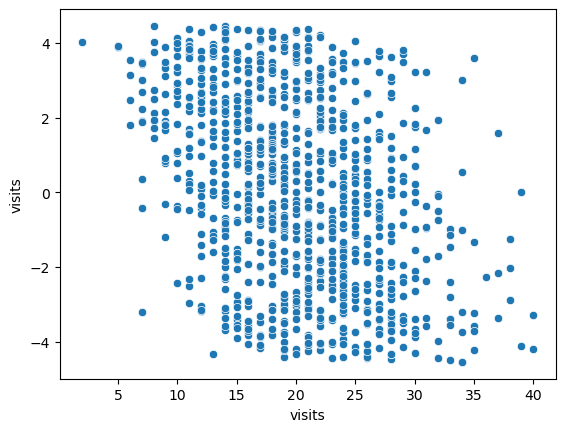

In [81]:
sns.scatterplot(x=y, y=residual)

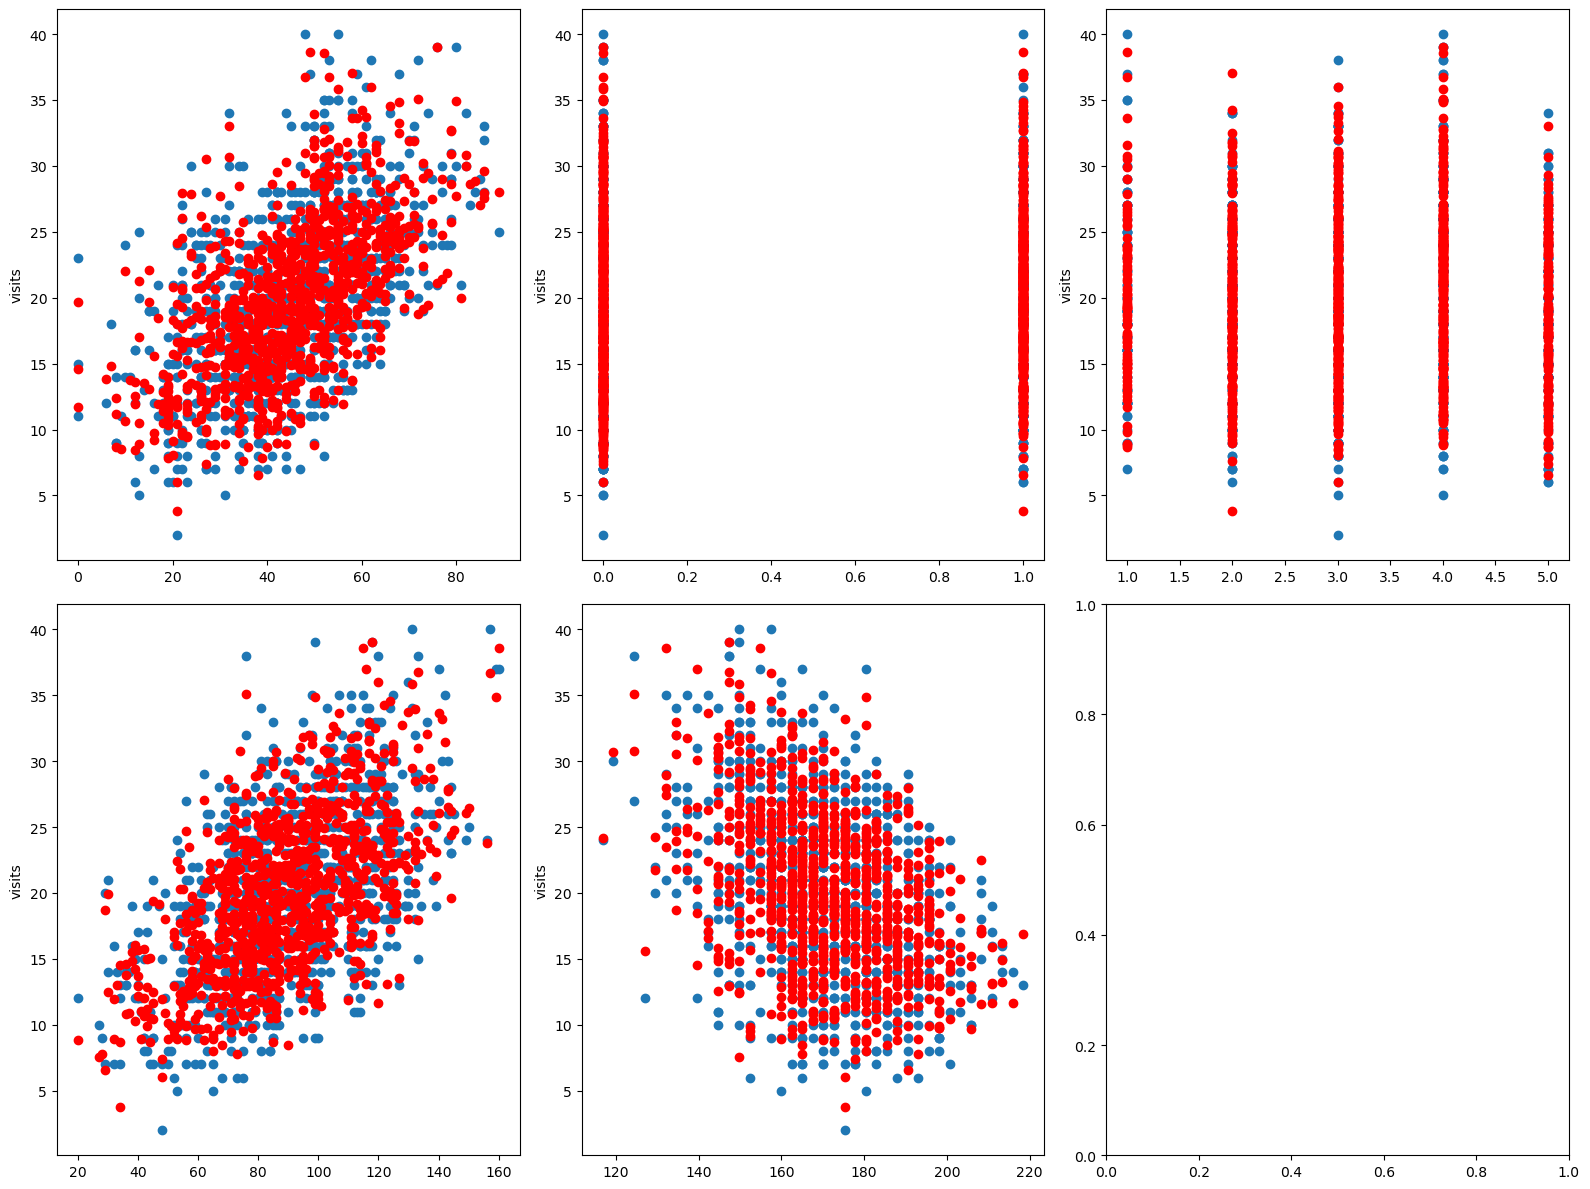

In [82]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,12))

axes[0,0].plot(df['yas'],df['visits'],'o')
axes[0,0].plot(df['yas'],y_hat,'o',color='red')
axes[0,0].set_ylabel("visits")

axes[0,1].plot(df['cinsiyet'],df['visits'],'o')
axes[0,1].plot(df['cinsiyet'],y_hat,'o',color='red')
axes[0,1].set_ylabel("visits")

axes[0,2].plot(df['ırk'],df['visits'],'o')
axes[0,2].plot(df['ırk'],y_hat,'o',color='red')
axes[0,2].set_ylabel("visits")

axes[1,0].plot(df['kilo'],df['visits'],'o')
axes[1,0].plot(df['kilo'],y_hat,'o',color='red')
axes[1,0].set_ylabel("visits")

axes[1,1].plot(df['boy'],df['visits'],'o')
axes[1,1].plot(df['boy'],y_hat,'o',color='red')
axes[1,1].set_ylabel("visits")

plt.tight_layout();